In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import learning_curve
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [26]:
iris_df = datasets.load_iris(as_frame=True)
features=iris_df.feature_names
df=pd.DataFrame(iris_df.data)
df['target']=iris_df.target
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


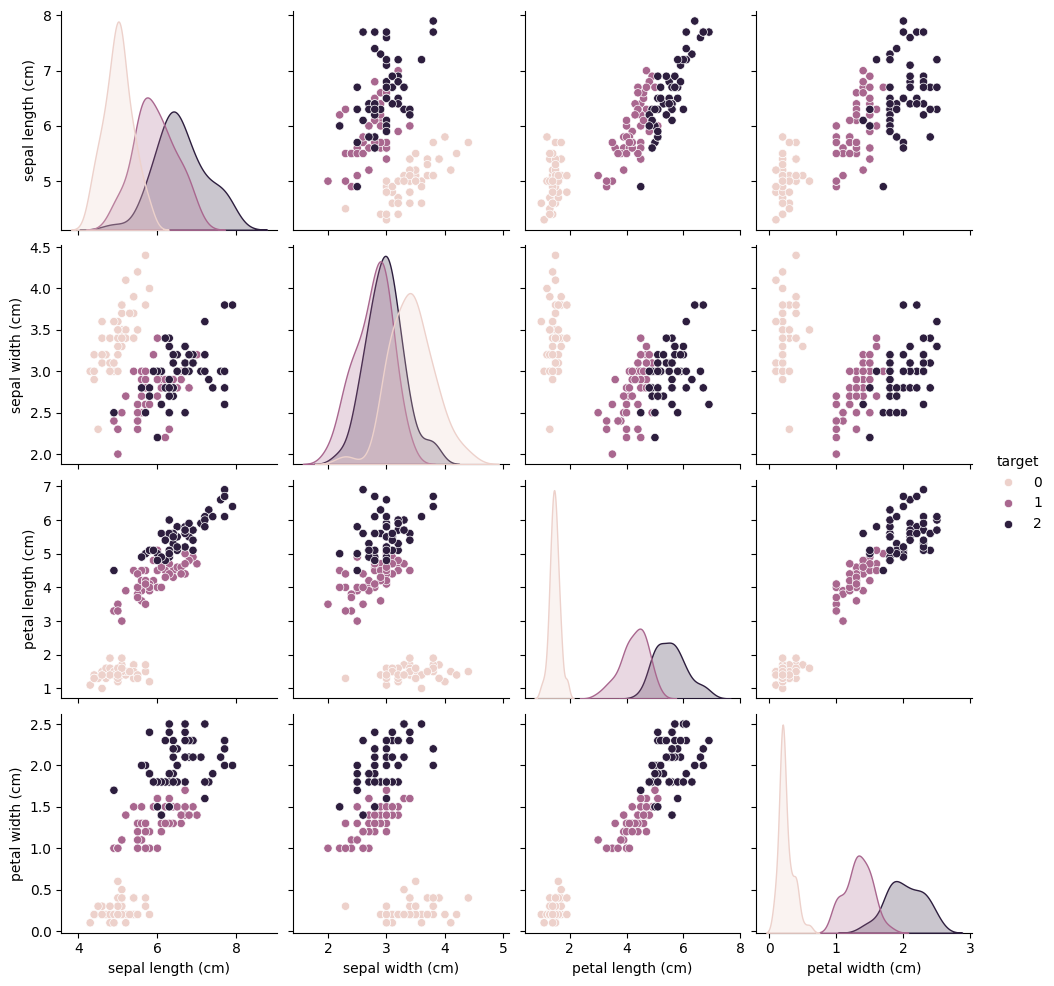

In [27]:
#visualization
sns.pairplot(df,hue='target')

In [28]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [29]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

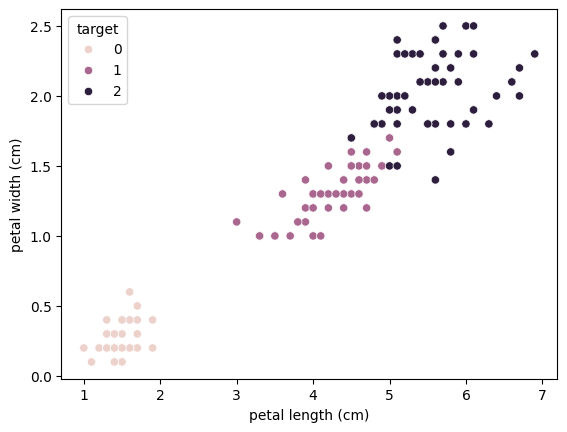

In [30]:
sns.scatterplot(data=df,x='petal length (cm)',y='petal width (cm)', hue='target')

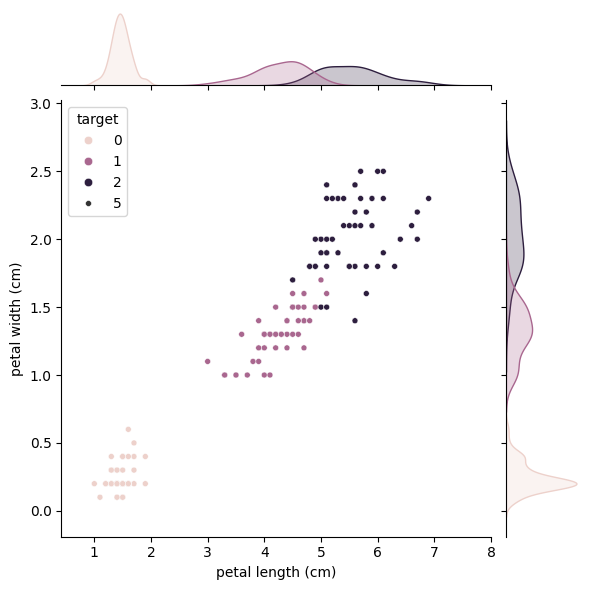

In [31]:
sns.jointplot(x="petal length (cm)", y="petal width (cm)",hue='target', data=df, size=5)

<Axes: >

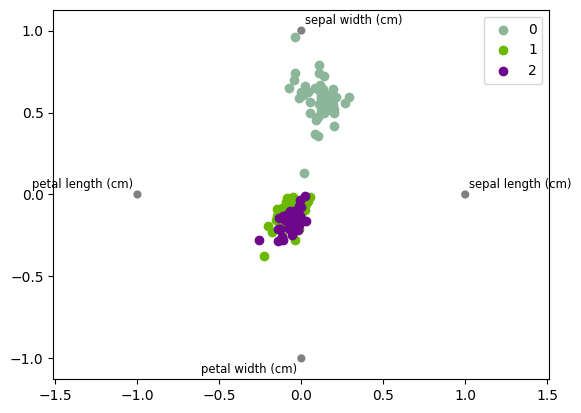

In [32]:
from pandas.plotting import radviz
radviz(df, "target")

## Decission Tree Classifier

In [33]:
#split data into train test
x= df.iloc[:, :-1]
y= df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
decission_tree_model= DecisionTreeClassifier()

In [35]:
decission_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred= decission_tree_model.predict(x_test)
y_train_pred = decission_tree_model.predict(x_train)

<Axes: >

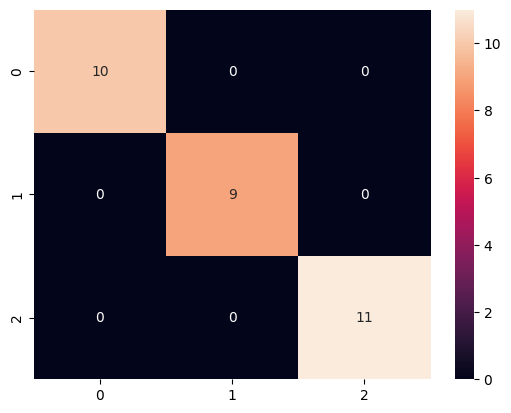

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [39]:
accuracy_dt= accuracy_score(y_test, y_pred)
print(accuracy_dt)

1.0


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



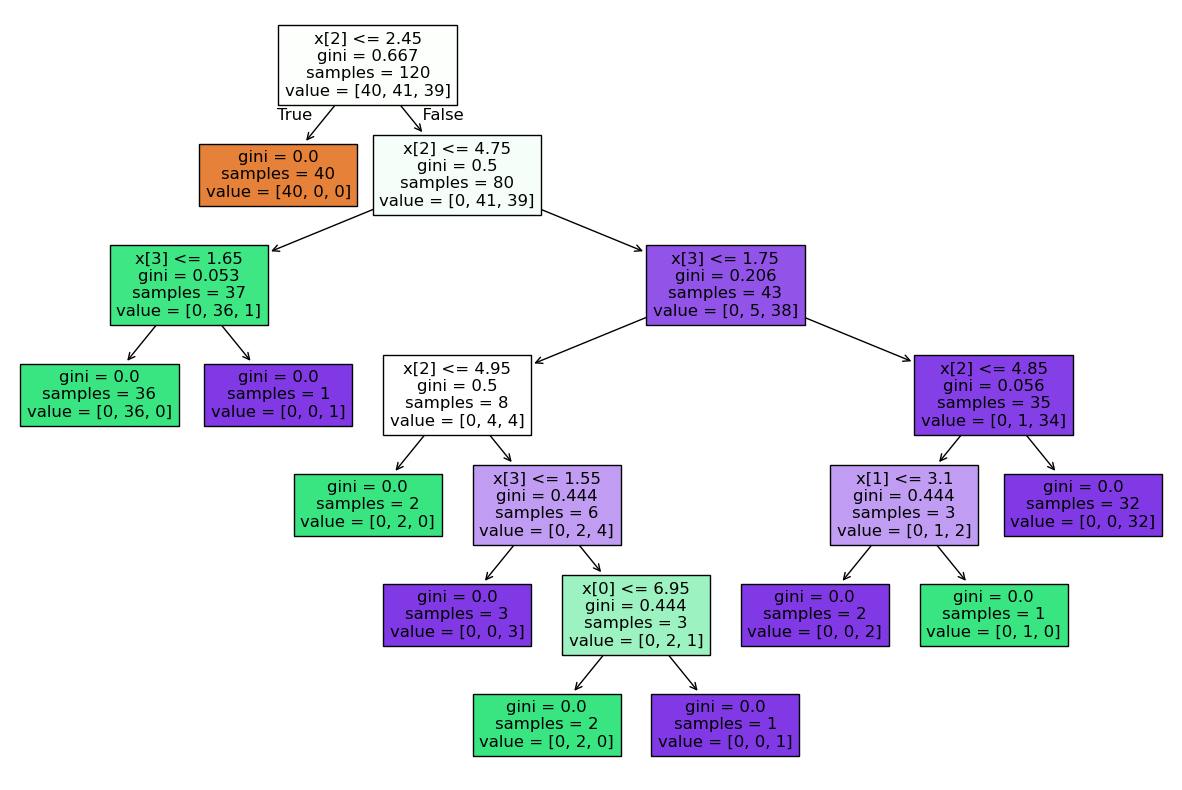

In [41]:
#visualize decission tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(decission_tree_model, filled=True)
plt.show()

In [42]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy:  {test_acc:.2f}")

Train Accuracy: 1.00
Test Accuracy:  1.00


In [ ]:
scores = cross_val_score(decission_tree_model, x, y, cv=5)
print("CV scores:", scores)
print("Mean CV accuracy:", scores.mean())

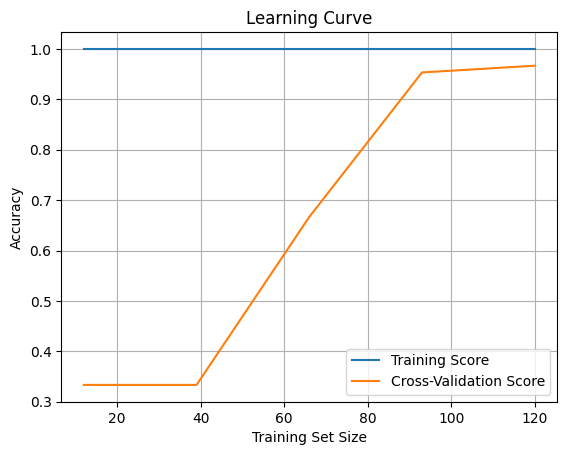

In [43]:
dt_train_sizes, dt_train_scores, dt_test_scores = learning_curve(
    decission_tree_model, x, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(dt_train_scores, axis=1)
test_mean = np.mean(dt_test_scores, axis=1)

plt.plot(dt_train_sizes, train_mean, label='Training Score')
plt.plot(dt_train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.grid()
plt.show()

#### Build Decession Tree from Scratch

In [45]:
# implimenting decission tree from scratch without SK learn library
class Node():
  def __init__(self, feature_index=None, threshold=None, left= None, right=None, info_gain=None, value=None):
    self.feature_index= feature_index
    self.threshold= threshold
    self.left= left
    self.right= right
    self.info_gain= info_gain
    #for leaf Node
    self.value= value

from ast import mod
class DecissionTreeClassifier():
  def __init__(self, min_samples_split=2, max_depth=2,n_feature=None):

    #for root node
    self.root= None

    #stoping condition
    #if in a perticular node numbner of sample less than the minimum sample then don't split the node further
    #if depth of tree becomes the maximum then also we wont split the tree further

    self.min_samples_split= min_samples_split
    self.max_depth= max_depth
    self.n_feature= n_feature

  def build_tree(self, datasets, curr_depth=0):
    """Recursive function to build tree"""

    #get the x and y form the dataset
    x= datasets[:, :-1]
    y= datasets[:, -1]

    # GET THE NUMBER OF FEATURE AND NUMBER OF SAMPLE
    num_samples= np.shape(x)[0]
    num_features= np.shape(x)[1] if not self.n_feature else min(self.n_feature, np.shape(x)[1])

    if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
      # find the best split
      best_split= self.get_best_split(datasets, num_samples, num_features)

      # to split the node we have to check if information gain is greater than 0
      # if the information gain is =0 means it is a pure node and there is no point in spliting the same node
      if best_split['info_gain']>0:

        #build the left sub tree
        left_subtree= self.build_tree(best_split['dataset_left'], curr_depth+1)

        #build right subtree

        right_subtree= self.build_tree(best_split['dataset_right'], curr_depth+1)

        #return the node
        return Node(best_split['feature_index'], best_split['threshold'],
                    left_subtree, right_subtree, best_split['info_gain'])

    #compute4 the leaf node
    leaf_node= self.calculate_leaf_node(y)
    return Node(value= leaf_node)

  def get_best_split(self, datasets, num_samples, num_features):
    """function to find the best split"""

    best_split= {}

    max_info_gain= -float("inf")

    #loop for all the feature
    for feature_index in range(num_features):
      features_values= datasets[:, feature_index]

      possible_thresholds= np.unique(features_values)

      for threshold in possible_thresholds:
        #get current split
        dataset_left, dataset_right= self.split(datasets, feature_index, threshold)

        #check if child are not null
        if len(dataset_left)>0 and len(dataset_right)>0:

          #get the target value
          y, left_y, right_y= datasets[:, -1], dataset_left[:, -1], dataset_right[:, -1]

          #compute information gain
          curr_info_gain= self.information_gain(y, left_y, right_y, "gini")

          if curr_info_gain> max_info_gain:
            best_split['feature_index']= feature_index
            best_split['threshold']= threshold
            best_split['dataset_left']= dataset_left
            best_split['dataset_right']= dataset_right
            best_split['info_gain']= curr_info_gain
            max_info_gain= curr_info_gain

    return best_split

    #split the the dataset based on threshold

  def split(self, dataset, feature_index, threshold):

    dataset_left= np.array([row for row in dataset if row[feature_index]<= threshold])
    dataset_right= np.array([row for row in dataset if row[feature_index]> threshold])

    return dataset_left, dataset_right

  def information_gain(self, parent, l_child, r_child, mode="entropy"):
    """Function to compute information gain"""
    weight_l= len(l_child)/len(parent)
    weight_r= len(r_child)/len(parent)

    if mode=="gini":
      gain= self.gini(parent) - (weight_l*self.gini(l_child) + weight_r*self.gini(r_child))
    else:

      gain= self.entropy(parent)- (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
    return gain

  def gini(self, y):

    """Function to calculate gini index """

    class_labels= np.unique(y)
    gini= 0
    for cls in class_labels:
      p_cls= len(y[y==cls])/len(y)
      gini+= p_cls**2
    return 1- gini

  def entropy(self, y):
    """Function to calculate entropy"""

    class_labels= np.unique(y)
    entropy= 0
    for cls in class_labels:
      p_cls= len(y[y==cls])/len(y)
      entropy= p_cls+ np.log2(p_cls)
    return -entropy

  def calculate_leaf_node(self, y):
    """ Function to calculate the leaf node"""
    y= list(y)
    return max(y, key=y.count)

  def print_tree(self, tree=None, indent=" "):
    """Function to print the tree"""
    if not tree:
      tree= self.root
    if tree.value is not None:
      print(tree.value)
    else:
      print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
      print("%sleft:" % (indent), end="")
      self.print_tree(tree.left, indent + indent)
      print("%sright:" % (indent), end="")
      self.print_tree(tree.right, indent + indent)

  def fit(self, x, y):
    datasets= np.concatenate((x, y), axis=1)
    self.root= self.build_tree(datasets)

  def predict(self, X):

    predictions= [self.make_prediction(x, self.root) for x in X]
    return predictions

  def make_prediction(self, x, tree):

    if tree.value!= None:
      return tree.value
    features_values= x[tree.feature_index]
    if features_values<= tree.threshold:
      return self.make_prediction(x, tree.left)
    else:
      return self.make_prediction(x, tree.right)

In [46]:
X1= df.iloc[:, :-1].values
Y1= df.iloc[:, -1].values.reshape(-1,1)
x_train_1, x_test_1, y_train_1, y_test_1= train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [47]:
self_decission_tree_model= DecissionTreeClassifier(min_samples_split=3, max_depth=3)
self_decission_tree_model.fit(x_train_1, y_train_1)
self_decission_tree_model.print_tree()

X_2 <= 1.9 ? 0.3334027777777778
 left:0.0
 right:X_2 <= 4.7 ? 0.364898059396606
  left:X_3 <= 1.6 ? 0.0525931336742147
    left:1.0
    right:2.0
  right:X_3 <= 1.7 ? 0.06731051533647531
    left:X_2 <= 4.9 ? 0.16666666666666669
        left:1.0
        right:2.0
    right:X_2 <= 4.8 ? 0.01741496598639456
        left:2.0
        right:2.0


In [48]:
y_scratch_dt_pred= self_decission_tree_model.predict(x_test_1)
accuracy_score(y_test_1, y_scratch_dt_pred)

1.0

In [49]:
print(classification_report(y_test_1, y_scratch_dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

